In [1]:
from numpy import genfromtxt
from PIL import Image, ImageDraw, ImageChops
import numpy as np
import cv2
import json
from matplotlib import pyplot as plt
from skimage.morphology import binary_opening, binary_closing,binary_erosion, rectangle, binary_dilation, disk
from skimage.segmentation import find_boundaries

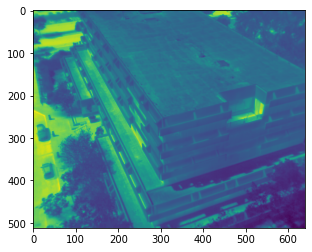

In [2]:
#thermal_tab = genfromtxt("/Users/stouzani/Google Drive/LBL-drone-thermal-project/Drone_Images_December2019/Thermal/DJI_0351.jpg", delimiter=',')
thermal_tab = genfromtxt('//Users/rohullahnajibi/desktop/Blume/Real_DJI_0028.csv', delimiter=',')

# thermal_tab = np.rot90(thermal_tab,3)
# exclude the bottom right column because of some noise
# thermal_tab = thermal_tab[0:147,0:485]
plt.figure()
plt.imshow(thermal_tab)

In [3]:
thermal_tab.shape

(512, 640)

In [4]:
np.amax(thermal_tab)

42.320155000418

In [5]:
np.amin(thermal_tab)

8.13733356738288

In [6]:
# mask_json = json.load(open('/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Veracruz/masks_thm/DJI_0490_2.json'))

In [7]:
# objects = mask_json.get("objects")[0]

In [8]:
# points_lab = objects['points']

In [9]:
# nested_lists = points_lab['exterior']

In [10]:
# mask_polygon = [tuple(l) for l in nested_lists]

In [11]:
# def getMask(original,polygon):
#     #Returns the mask of the polygon
#     mask = Image.new('L', (original.shape[1],original.shape[0]), 0)
#     mask_draw = ImageDraw.Draw(mask)
#     mask_draw.polygon(polygon, outline=1, fill=1)
#     return np.array(mask, dtype=bool)

In [12]:
# mask = getMask(thermal_tab,mask_polygon)

In [13]:
# mask.shape

In [14]:
# plt.figure()
# plt.imshow(mask)

In [5]:
mask = np.load('/Users/rohullahnajibi/desktop/Blume/test/out/DJI_0028.npy')
mask = np.array(mask, dtype=bool) # gives true false values 

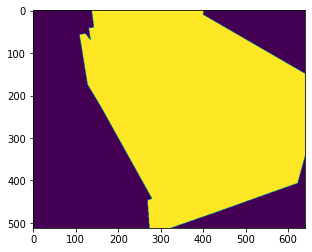

In [6]:
plt.figure()
plt.imshow(mask)

In [7]:
pixel_values = thermal_tab.reshape((-1, 1))
pixel_values = np.float32(pixel_values)
pixel_values.shape

(327680, 1)

In [8]:
mask_pixel_values = mask.reshape((-1, 1))
mask_pixel_values.shape
#mask_pixel_values[5]

(327680, 1)

In [9]:
pixel_values_croped = pixel_values[mask_pixel_values].reshape((-1, 1))
#pixel_values_croped = pixel_values.reshape((-1, 1))
pixel_values_croped.shape

(194593, 1)

In [10]:
pixel_values_croped.shape

(194593, 1)

In [11]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
# cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER means stop the algorithm if we have 
# gotten to epsilon accuracy of 0.2 or iterated 100 times.
# 100 is # of iterations 
# 0.2 is epsilon accuracy
print(criteria)

(3, 100, 0.2)


In [12]:

# number of clusters (K)
k = 16
_, labels, (centers) = cv2.kmeans(pixel_values_croped, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
#print(_)
#print(labels)
#print(centers)

In [13]:
# convert back to 8 bit values
centers = np.int8(centers)
#print("centers: ")
#print(centers)
#print(len(centers))

# flatten the labels array
labels = labels.flatten()
#print("labels: ")
labels.shape

(194593,)

In [14]:
# convert all pixels to the color of the centroids
segmented_image_copped = centers[labels.flatten()]
segmented_image_copped

#Segmented_image_copped is a dereference of labels.flatten()
#Look at the following example
#x = np.array([[5], [6], [7], [8], [9]])
#y = np.array([0, 2, 3, 4])
#z = x[y.flatten()] #Output: array([[5], [7], [8], [9])
#z

array([[18],
       [18],
       [19],
       ...,
       [18],
       [17],
       [16]], dtype=int8)

In [15]:
segmented_image_copped.shape
#(194593, 1) means 194593 rows, 1 column

(194593, 1)

In [16]:
segmented_image_copped.dtype

dtype('int8')

In [17]:
segmented_image = 10+np.zeros(pixel_values.shape, dtype=int) #pixel_values.astype(np.int8)
segmented_image
#fills the array with 10's
#x = np.array([[1],[2],[3],[4]])
#y = 10+np.zeros(x.shape, dtype=int)
#y output: array([[10],[10],[10],[10]])

array([[10],
       [10],
       [10],
       ...,
       [10],
       [10],
       [10]])

In [18]:
segmented_image[mask_pixel_values]  = segmented_image_copped[:,0]
segmented_image[mask_pixel_values]
#assigns elements of the segmented_image_copped to the false values of segmented_image
#all values of 10 are the background color while the other numbers give us the facade.

array([18, 18, 19, ..., 18, 17, 16])

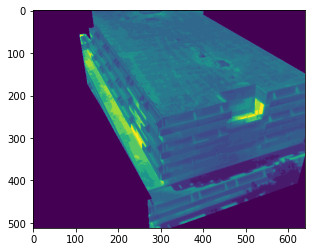

In [48]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(thermal_tab.shape)
# show the image
plt.imshow(segmented_image)
#plt.show()
plt.savefig('//Users/rohullahnajibi/desktop/segmented_DJI_0028.png')


In [45]:
im = Image.fromarray(segmented_image)
im.save('//Users/rohullahnajibi/desktop/segmented_DJI_0028.png')

TypeError: Cannot handle this data type: (1, 1), <i8

In [20]:
segmented_image_1 = Image.fromarray(np.float32(segmented_image))

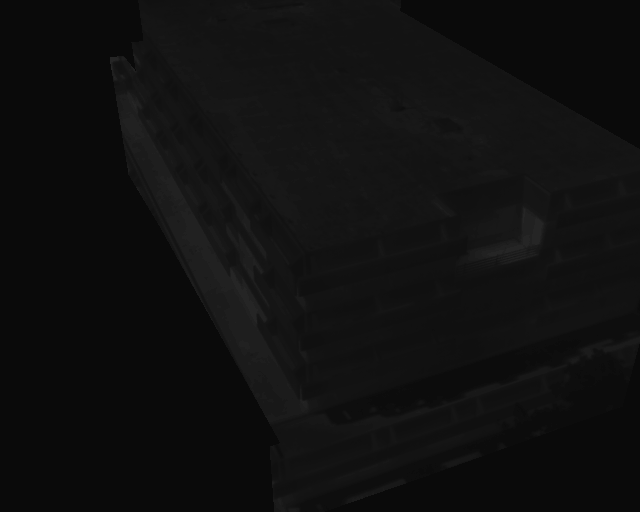

In [21]:
segmented_image_1 = segmented_image_1.convert("RGBA")
segmented_image_1

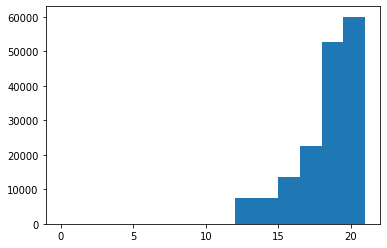

In [75]:
from matplotlib import pyplot as plt

# x = np.random.randint(25,100,25)
# y = np.random.randint(175,255,25)
# z = np.hstack((x,y))
# z = z.reshape((50,1))
# z = np.float32(z)
plt.hist(segmented_image_copped,14,[0,21])#,plt.show()
#plt.savefig('//Users/rohullahnajibi/desktop/deliverables/histogram_DJI_0028.png')

#plt.hist(pixel_values_croped,14,[14,21]),plt.show()

# plt.hist(pixel_values,20,[18,22]),plt.show()
#np.min(segmented_image_copped)
#np.max(segmented_image_copped)

In [53]:
segmented_image_f = np.float32(segmented_image)
#segmented_image_f[100]
# segmented_image_f = np.float32(thermal_tab)

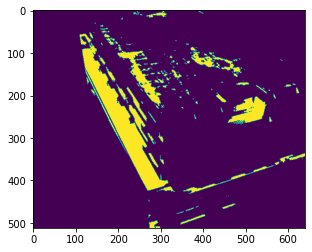

In [54]:
# th = cv2.threshold(segmented_image_f,19.5,255,cv2.THRESH_BINARY)[1]
th = cv2.threshold(segmented_image_f,22,255,cv2.THRESH_BINARY_INV)[1]
#from keras.preprocessing import image
#segmented_image_f = image.img_to_array(segmented_image_f, dtype='uint8')
#th = cv2.adaptiveThreshold(segmented_image_f, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)[1]
#th.shape
thresholded = th.astype(np.uint8)
thresholded = np.invert(thresholded)
plt.figure()
plt.imshow(thresholded)
#plt.savefig('//Users/rohullahnajibi/desktop/binary_DJI_0028.png')

In [56]:
# morphological operation
thresholded = binary_dilation(thresholded, rectangle(1,5))

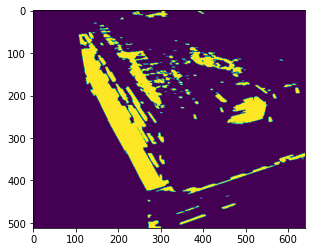

In [57]:
plt.figure()
plt.imshow(thresholded)

In [65]:
# thresholded = binary_erosion(thresholded, rectangle(5,1))
# plt.figure()
# plt.imshow(thresholded)

In [66]:
thresholded_2 = thresholded.astype(np.uint8)
contours, hierarchy = cv2.findContours(thresholded_2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [67]:
thermal_im = 255*(thermal_tab - np.min(thermal_tab))/np.ptp(thermal_tab).astype(int)

In [68]:
thermal_im = cv2.cvtColor(thermal_im.astype(np.uint8),cv2.COLOR_GRAY2RGB)

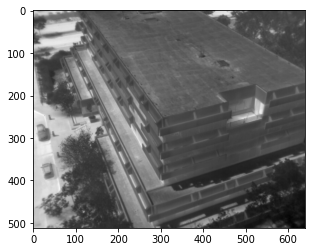

In [69]:
plt.figure()
plt.imshow(thermal_im)

In [73]:
mask = np.zeros(thermal_im.shape, np.uint8)
borders_im = cv2.drawContours(mask, contours, -1, (255,0,0),3)

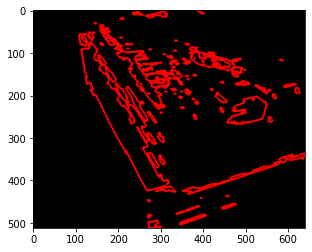

In [74]:
plt.figure()
plt.imshow(borders_im)
plt.savefig('//Users/rohullahnajibi/desktop/borders_DJI_0028.png')

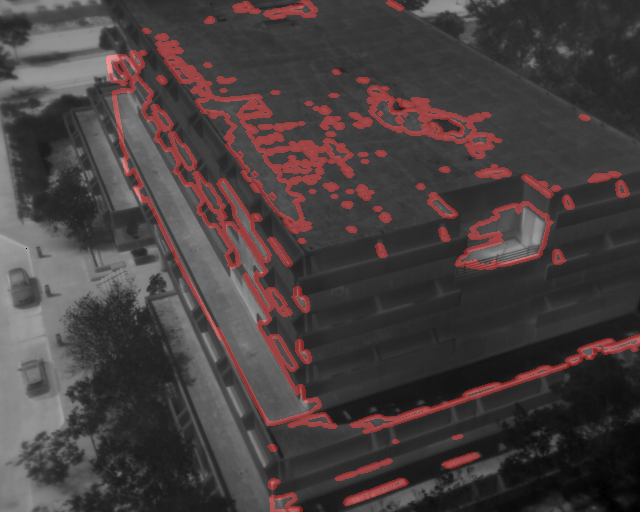

In [71]:
thermal_im_1 = Image.fromarray(thermal_im)
borders_im_1 = Image.fromarray(borders_im)
thermal_im_1 = thermal_im_1.convert("RGBA")
borders_im_1 = borders_im_1.convert("RGBA")
new_img = Image.blend(thermal_im_1, borders_im_1, 0.35)
new_img

In [588]:
new_img.save('//Users/rohullahnajibi/desktop/Blume/leak_DJI_0028.png')

In [72]:
segmented_image_0 = segmented_image
segmented_image_0[np.where(np.logical_not(mask))] =0
mask.shape

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

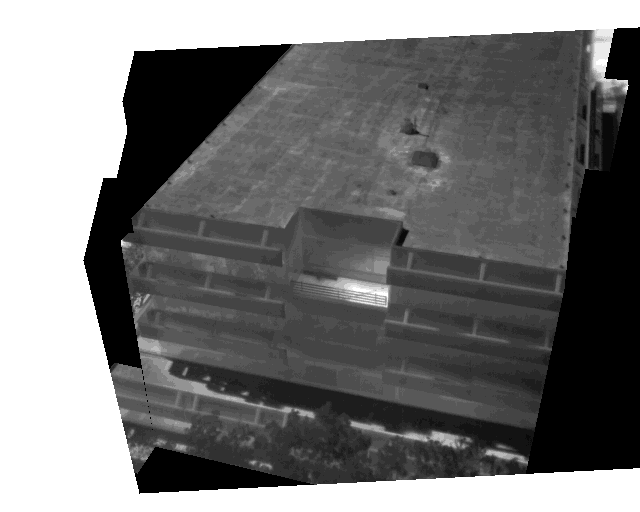

In [188]:
mask = np.load('//Users/rohullahnajibi/desktop/Blume/DJI_0001.npy')
mask = np.array(mask, dtype=bool)
segmented_image_1 = Image.fromarray(np.float32(segmented_image))
segmented_image_im = 255*(segmented_image_1 - np.min(segmented_image_1))/np.ptp(segmented_image_1).astype(int)
segmented_image_im = cv2.cvtColor(segmented_image_im.astype(np.uint8),cv2.COLOR_GRAY2RGB)
crop_color = (255, 255, 255)
segmented_image_im[np.where(np.logical_not(mask))] = crop_color
segmented_image_im = Image.fromarray(segmented_image_im)
segmented_image_im = segmented_image_im.convert("RGBA")
segmented_image_im

In [97]:
segmented_image_im.save('//Users/rohullahnajibi/desktop/quantized_DJI_0001.png')

In [98]:
def crop_image_outside_building(image, merged_polygons, offset, pmatrix):
    crop_color = (0.0, 0.0, 0.0, 0.0)
    im_shape = np.array(image).shape
    cropped_image = np.array(image)
    mask = np.zeros(im_shape[:2], dtype=np.uint8)

    for i in range(len(merged_polygons)):
        polygon = merged_polygons[i]
        projected_facades = get_projected_facades(polygon, pmatrix, offset=offset)
        poly_mask = get_polygon_mask(im_shape, projected_facades)
        mask[np.where(poly_mask)] = 1

    cropped_image[np.where(np.logical_not(mask))] = crop_color
    cropped_image = Image.fromarray(cropped_image, 'RGBA')
    return cropped_image

In [ ]:
#This is the code in R Programming Langugae used to produce thermal images

library(Thermimage)
library(fields)


# Function that read the RJPEG image and convert it into a Matrix where the values are the absolute temperatures 
# the image can be croped (the default values take the whole image)
plot_thermal <- function(image_path,crop=c(1,512,1,640)){ #[1:512,1:640]
  img<-readflirJPG(image_path, exiftoolpath="installed")
  cams<-flirsettings(f, exiftoolpath="installed", camvals="")
  ObjectEmissivity<- cams$Info$Emissivity              # Image Saved Emissivity - should be ~0.95 or 0.96
  dateOriginal<-cams$Dates$DateTimeOriginal             # Original date/time extracted from file
  dateModif<-   cams$Dates$FileModificationDateTime     # Modification date/time extracted from file
  PlanckR1<-    cams$Info$PlanckR1                      # Planck R1 constant for camera  
  PlanckB<-     cams$Info$PlanckB                       # Planck B constant for camera  
  PlanckF<-     cams$Info$PlanckF                       # Planck F constant for camera
  PlanckO<-     cams$Info$PlanckO                       # Planck O constant for camera
  PlanckR2<-    cams$Info$PlanckR2                      # Planck R2 constant for camera
  ATA1<-        cams$Info$AtmosphericTransAlpha1        # Atmospheric Transmittance Alpha 1
  ATA2<-        cams$Info$AtmosphericTransAlpha2        # Atmospheric Transmittance Alpha 2
  ATB1<-        cams$Info$AtmosphericTransBeta1         # Atmospheric Transmittance Beta 1
  ATB2<-        cams$Info$AtmosphericTransBeta2         # Atmospheric Transmittance Beta 2
  ATX<-         cams$Info$AtmosphericTransX             # Atmospheric Transmittance X
  OD<-          cams$Info$ObjectDistance                # object distance in metres
  FD<-          cams$Info$FocusDistance                 # focus distance in metres
  ReflT<-       cams$Info$ReflectedApparentTemperature  # Reflected apparent temperature
  AtmosT<-      cams$Info$AtmosphericTemperature        # Atmospheric temperature
  IRWinT<-      cams$Info$IRWindowTemperature           # IR Window Temperature
  IRWinTran<-   cams$Info$IRWindowTransmission          # IR Window transparency
  RH<-          cams$Info$RelativeHumidity              # Relative Humidity
  h<-           cams$Info$RawThermalImageHeight         # sensor height (i.e. image height)
  w<-           cams$Info$RawThermalImageWidth          # sensor width (i.e. image width)
  
  temperature<-raw2temp(img, ObjectEmissivity, OD, ReflT, AtmosT, IRWinT, IRWinTran, RH,
                        PlanckR1, PlanckB, PlanckF, PlanckO, PlanckR2, 
                        ATA1, ATA2, ATB1, ATB2, ATX)
  temperature <- temperature[crop[1]:crop[2],crop[3]:crop[4]]
  h2 = dim(temperature)[1]
  w2 = dim(temperature)[2]
  toto <- plotTherm(temperature, h=h2, w=w2, minrangeset=min(temperature)-min(temperature), maxrangeset=max(temperature)+0.5, trans="rotate270.matrix")
  return(temperature)
}

f<-"/Users/rohullahnajibi/Desktop/DJI_0202.jpg"

tem<-plot_thermal(f)

write.table(tem,"/Users/rohullahnajibi/Desktop/Real_DJI_0300.csv",row.names = FALSE, col.names =FALSE,sep = ",")



